In [6]:
import cv2
import matplotlib.pyplot as plt

In [7]:
face_model = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread('simogeopic.jpg')


print(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(gray.shape)
print(gray[10,10])

faces = face_model.detectMultiScale(gray, 1.2, 15)

print(faces)

for (x, y, w, h) in faces:
	# cv2.rectangle(img, (x-0.3*w,y-0.3*y), (x+w+0.3*w, y+h+0.3*w), (0,0,255), 5)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 5)
    
# test access and modification of corners
par = 0.3
a = faces[0][0]  # x 
b = faces[0][1]  # y
c = faces[0][2]  # width
d = faces[0][3]  # height

a2 = int(round((a - par * c), 0))  # x 
b2 = int(round((b - par * d), 0))  # y
c2 = int(round((c * (1 + 2 * par)), 0))  # width
d2 = int(round((d * (1 + 2 * par)), 0))  # height

print(a2,b2,c2,d2)
cv2.rectangle(img, (a2,b2), (a2+c2, b2+d2), (0,255,0), 5)

# cv2.imwrite('output.png', img)
cv2.imshow('look at this awesome cohort', img)
cv2.waitKey(10000)

(720, 1080, 3)
(720, 1080)
254
[[654 112 293 293]]
566 24 469 469


-1

In [39]:
x,y,w,h = faces[0]
print(x,y,w,h)

654 112 293 293


In [3]:
img.shape

(720, 1080, 3)

In [5]:
img[:3].shape

(3, 1080, 3)

In [17]:
test_img = img[b:b+d, a:a+c]

In [19]:
test_img.shape

(293, 293, 3)

In [21]:
test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

In [22]:
test_gray.shape

(293, 293)

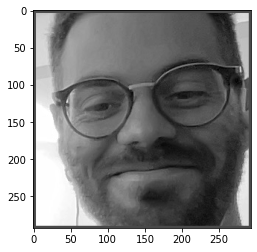

In [25]:
plt.imshow(test_gray, cmap='gray')

In [26]:
test_resized = cv2.resize(test_gray, (48, 48), interpolation = cv2.INTER_AREA)

In [28]:
test_resized.shape

(48, 48)

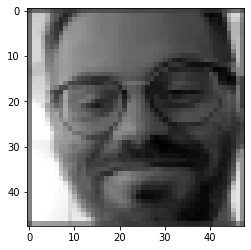

In [29]:
plt.imshow(test_resized, cmap='gray')

(48, 48)


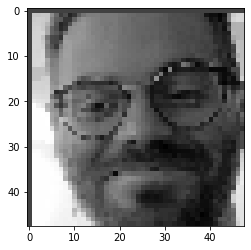

In [34]:
test_resized = cv2.resize(test_gray, (48, 48), interpolation = cv2.INTER_NEAREST)
print(test_resized.shape)
plt.imshow(test_resized, cmap='gray')

In [32]:
interpolations = ['INTER_NEAREST', 'INTER_LINEAR', 'INTER_AREA', 'INTER_NEAREST', 'INTER_CUBIC', 'INTER_LANCZOS4']

In [53]:
import cv2
img = cv2.imread('simogeopic.jpg')

def user_pic_preproc(img, bor=0):
    '''convert user picture to grayscale, identify and extract the face and compress to 48 x 48 pixels'''
    face_model = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_model.detectMultiScale(gray, 1.2, 15)
    
    # set additional border to face detection for picture extraction 
    x, y, w, h = faces[0]
    x2 = int(round((x - bor * w), 0))  # x 
    y2 = int(round((y - bor * h), 0))  # y
    w2 = int(round((w * (1 + 2 * bor)), 0))  # width of extraction
    h2 = int(round((h * (1 + 2 * bor)), 0))  # height of extraction
    
    img_face = gray[y2 : y2 + h2, x2 : x2 + w2]
    img_resized = cv2.resize(img_face, (48, 48), interpolation = cv2.INTER_AREA)
    
    return img_resized    

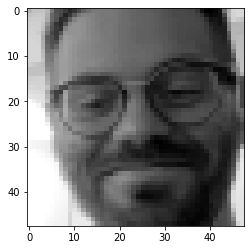

In [54]:
proc_img = user_pic_preproc(img)
plt.imshow(proc_img, cmap='gray')